<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Home Prices in Tashkent</h1>


Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:blue'>Data Load: Load Tashkent home prices into a dataframe</h2>


In [4]:
df1 = pd.read_csv("C:/Data Scients/Learn Data Science/Learn MachineLearning/Olx End to End Project/new building.csv")
df1.head()
df1['type'].unique()

array(['new', 'type', 'secondary'], dtype=object)

In [5]:
df2 = pd.read_csv("C:/Data Scients/Learn Data Science/Learn MachineLearning/Olx End to End Project/secondary building.csv")
df2.head()
df2['type'].unique()

array(['secondary', 'type'], dtype=object)

In [6]:
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(12667, 6)

In [7]:
df.columns

Index(['Price', 'Area', 'rooms', 'type', 'City_District', 'Date'], dtype='object')

In [8]:
df.head()

,Price,Area,rooms,type,City_District,Date
0,40000,44.0,1,new,"Tashkent, Yunusabad district","June 24, 2023"
1,17800,14.0,1,new,"Tashkent, Yashnabad district","June 25, 2023"
2,60000,42.61,1,new,"Tashkent, Yunusabad district","June 15, 2023"
3,41000,38.0,1,new,"Tashkent, Mirzo-Ulugbek district","June 24, 2023"
4,52000,40.0,1,new,"Tashkent, Chilanzar district","June 24, 2023"


In [9]:
df['type'].unique()

array(['new', 'type', 'secondary'], dtype=object)

In [10]:
df['City_District'].value_counts()

Tashkent, Chilanzar district        3062
Tashkent, Yunusabad district        2037
Tashkent, Mirzo-Ulugbek district    1895
Tashkent, Yakkasarai district       1125
Tashkent, Mirabad district          1103
Tashkent, Sergeli district           905
Tashkent, Yashnabad district         868
Tashkent, Shaikhantahur district     709
Tashkent, Almazar district           576
Tashkent, Uchtepinsky district       302
Tashkent, Bektemir district           48
City_District                         37
Name: City_District, dtype: int64

In [11]:
df['Date'].value_counts()

June 26, 2023     2537
June 25, 2023     2122
June 27, 2023     1916
June 24, 2023      754
July 03, 2023      653
                  ... 
Today at 12:20       1
Today at 12:29       1
Today at 12:34       1
Today at 12:36       1
Today at 11:44       1
Name: Date, Length: 539, dtype: int64

<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>


In [12]:
df.shape

(12667, 6)

In [13]:
df.isnull().sum()

Price            0
Area             0
rooms            0
type             0
City_District    0
Date             0
dtype: int64

In [14]:
df1 = df[df['City_District'] != 'City_District']
df1 = df[df['Date'].str.contains("Today") == False]
df1.shape

(11707, 6)

In [15]:
print(
    f"This is a before cleaning: {df.shape} \n this is after cleaning: {df1.shape}")

This is a before cleaning: (12667, 6) 
 this is after cleaning: (11707, 6)


In [16]:
df3 = df.dropna()
df3.isnull().sum()

Price            0
Area             0
rooms            0
type             0
City_District    0
Date             0
dtype: int64

**Drop duplicate values**


In [17]:
df3.duplicated().sum()
df3.shape

(12667, 6)

In [18]:
df4 = df3.drop_duplicates(
    subset=['type', 'Area', 'Price', 'City_District', 'rooms'])

In [19]:
df4[df4['type'] == 'type']
df4 = df4[df4['type'] != 'type']
df4['type'].unique()

array(['new', 'secondary'], dtype=object)

In [20]:
df4.duplicated().sum()
df4.shape

(7056, 6)

In [21]:
df4.head()

,Price,Area,rooms,type,City_District,Date
0,40000,44.0,1,new,"Tashkent, Yunusabad district","June 24, 2023"
1,17800,14.0,1,new,"Tashkent, Yashnabad district","June 25, 2023"
2,60000,42.61,1,new,"Tashkent, Yunusabad district","June 15, 2023"
3,41000,38.0,1,new,"Tashkent, Mirzo-Ulugbek district","June 24, 2023"
4,52000,40.0,1,new,"Tashkent, Chilanzar district","June 24, 2023"


<h2 style='color:blue'>Feature Engineering</h2>


**Add new feature(city name) from City_District column**


In [22]:
df4['City'] = df4['City_District'].apply(lambda x: x.split(',')[0])
df4['District'] = df4['City_District'].apply(
    lambda x: x.replace('Tashkent, ', ""))
del df4['City_District']
df4.head()

,Price,Area,rooms,type,Date,City,District
0,40000,44.0,1,new,"June 24, 2023",Tashkent,Yunusabad district
1,17800,14.0,1,new,"June 25, 2023",Tashkent,Yashnabad district
2,60000,42.61,1,new,"June 15, 2023",Tashkent,Yunusabad district
3,41000,38.0,1,new,"June 24, 2023",Tashkent,Mirzo-Ulugbek district
4,52000,40.0,1,new,"June 24, 2023",Tashkent,Chilanzar district


In [23]:
df4.head()

,Price,Area,rooms,type,Date,City,District
0,40000,44.0,1,new,"June 24, 2023",Tashkent,Yunusabad district
1,17800,14.0,1,new,"June 25, 2023",Tashkent,Yashnabad district
2,60000,42.61,1,new,"June 15, 2023",Tashkent,Yunusabad district
3,41000,38.0,1,new,"June 24, 2023",Tashkent,Mirzo-Ulugbek district
4,52000,40.0,1,new,"June 24, 2023",Tashkent,Chilanzar district


**Add new feature called price per square feet**


In [24]:
df5 = df4.copy()
df5['Price'] = df5['Price'].astype(float)
df5['rooms'] = df5['rooms'].astype(int)
df5['Area'] = df5['Area'].astype(float)

In [25]:
df5 = df5[df5['Area'] != 0]

In [26]:

df5['price_per_m2'] = round(df5['Price']/df5['Area'], 2)
df5.sort_values(by=['price_per_m2'])

,Price,Area,rooms,type,Date,City,District,price_per_m2
4671,4.0,51.0,1,new,"June 29, 2023",Tashkent,Shaikhantahur district,0.08
11706,4.0,51.0,1,secondary,"June 29, 2023",Tashkent,Shaikhantahur district,0.08
576,682.0,86.0,4,new,"June 25, 2023",Tashkent,Chilanzar district,7.93
5998,682.0,86.0,4,secondary,"June 25, 2023",Tashkent,Chilanzar district,7.93
8944,900.0,95.0,4,secondary,"June 26, 2023",Tashkent,Mirzo-Ulugbek district,9.47
...,...,...,...,...,...,...,...,...
3201,119000.0,4.0,4,secondary,"June 27, 2023",Tashkent,Mirzo-Ulugbek district,29750.00
9110,97000.0,3.0,4,secondary,"June 26, 2023",Tashkent,Mirzo-Ulugbek district,32333.33
12007,45000.0,1.0,1,secondary,"July 02, 2023",Tashkent,Yashnabad district,45000.00
5779,66000.0,1.0,3,secondary,"June 25, 2023",Tashkent,Uchtepinsky district,66000.00


In [27]:
df5_stats = df5['price_per_m2'].describe()
df5_stats

count     7052.000000
mean      1237.902645
std       1513.055865
min          0.080000
25%        956.520000
50%       1136.360000
75%       1361.110000
max      66000.000000
Name: price_per_m2, dtype: float64

<h2 style="color:blue">Outlier Removal Using Business Logic</h2>


**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally per square meter is $500. If you have for example apartment with per meter $ 200.0 sqft apartment with 2 rooms that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per meter to be $ 500 **


In [28]:
df6 = df5[df5['price_per_m2'] > 500]

** The minimum square meter for a 1-bedroom apartment in Tashkent is typically around 40 square meters. However, there are some apartments that are smaller than this, especially in the outskirts of the city. **


In [29]:
df6 = df6[df6['Area'] > 40]
df6

,Price,Area,rooms,type,Date,City,District,price_per_m2
0,40000.0,44.00,1,new,"June 24, 2023",Tashkent,Yunusabad district,909.09
2,60000.0,42.61,1,new,"June 15, 2023",Tashkent,Yunusabad district,1408.12
6,45000.0,42.00,1,new,"June 25, 2023",Tashkent,Yashnabad district,1071.43
10,71891.0,46.00,1,new,"June 25, 2023",Tashkent,Yunusabad district,1562.85
16,43500.0,43.00,1,new,"June 20, 2023",Tashkent,Yunusabad district,1011.63
...,...,...,...,...,...,...,...,...
12650,47000.0,42.00,1,secondary,"July 03, 2023",Tashkent,Yunusabad district,1119.05
12652,55000.0,44.00,1,secondary,"July 03, 2023",Tashkent,Chilanzar district,1250.00
12657,53000.0,43.00,1,secondary,"July 03, 2023",Tashkent,Shaikhantahur district,1232.56
12661,46500.0,42.00,1,secondary,"July 03, 2023",Tashkent,Almazar district,1107.14


In [30]:
df6.to_csv("olx_report.csv")

In [31]:
df6.price_per_m2.describe()

count    5014.000000
mean     1113.648997
std       340.450989
min       515.380000
25%       904.760000
50%      1052.630000
75%      1260.000000
max      8454.550000
Name: price_per_m2, dtype: float64

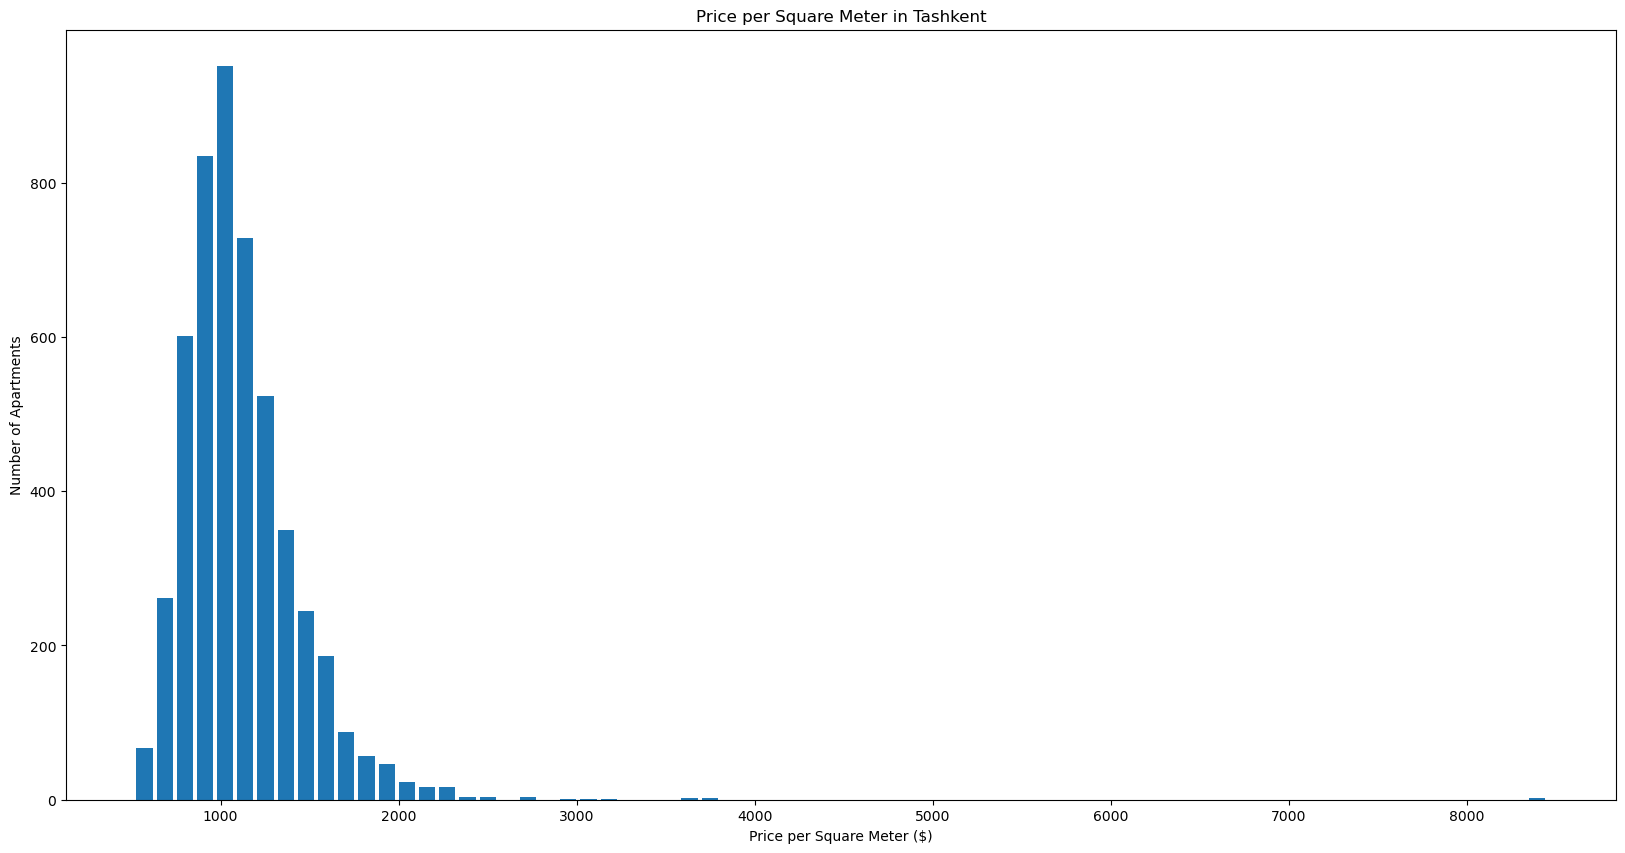

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of the price per square meter
prices = df6.price_per_m2.tolist()

# Create a histogram
plt.hist(prices, bins=70, rwidth=0.8)

# Add a title and labels to the axes
plt.title("Price per Square Meter in Tashkent")
plt.xlabel("Price per Square Meter ($)")
plt.ylabel("Number of Apartments")

# Show the plot
plt.show()

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**


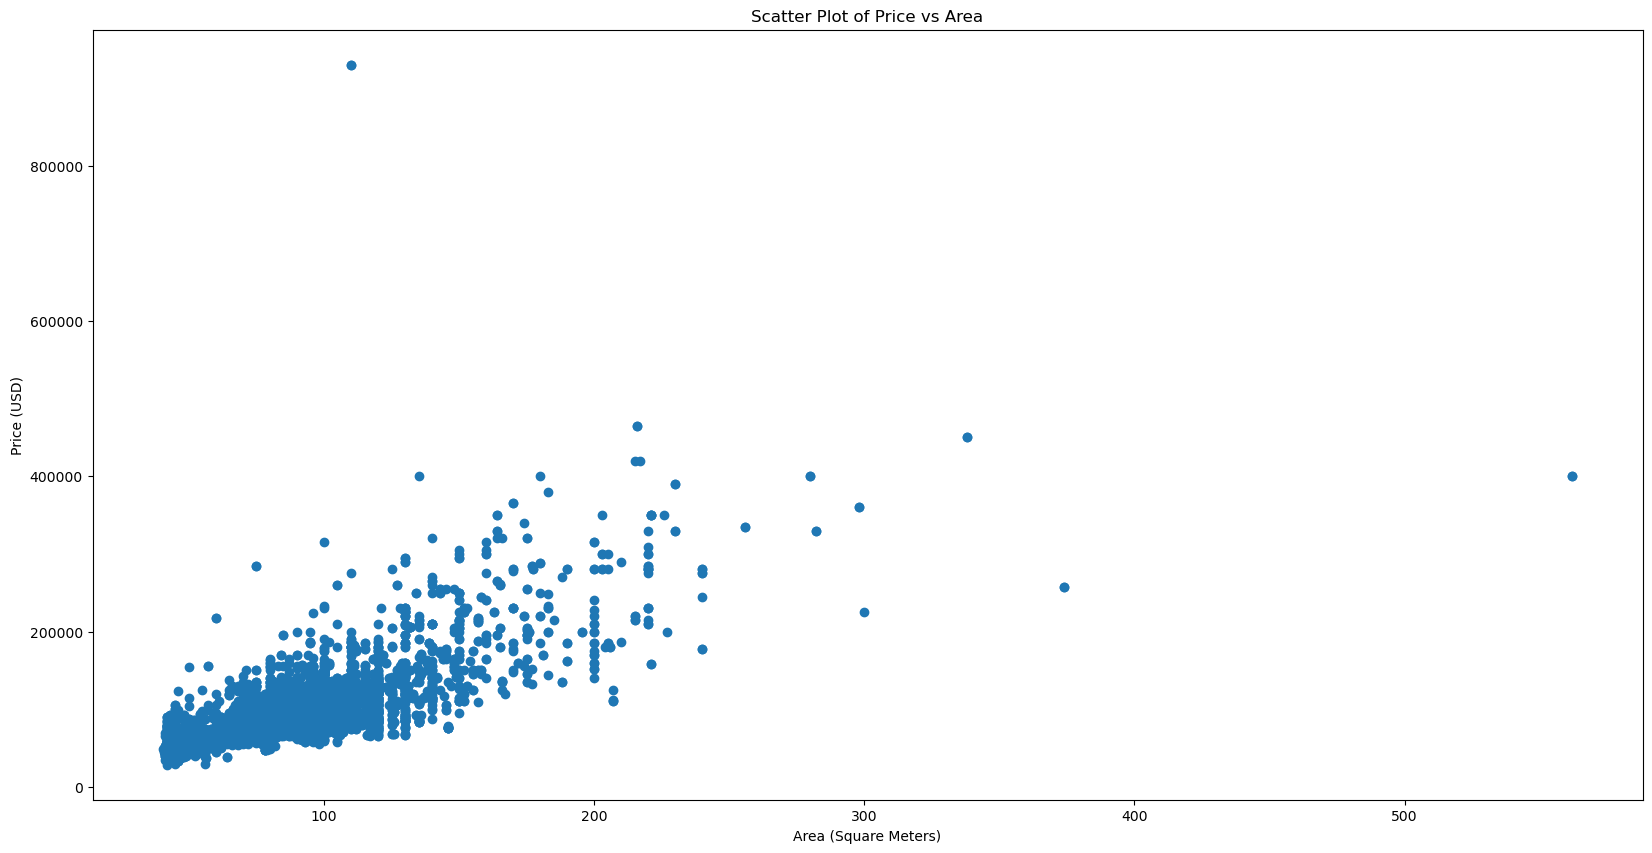

In [33]:
plt.scatter(df6.Area, df6.Price)

# Add a title and labels
plt.title("Scatter Plot of Price vs Area")
plt.xlabel("Area (Square Meters)")
plt.ylabel("Price (USD)")

# Show the plot
plt.show()

** From the scatter plot above, we can see that the price of the house is directly proportional to the size of the surface of the house. **


<img src="hebbal_outliers.png"></img>


<h2 style='color:blue'>Use One Hot Encoding For Location</h2>


In [34]:
df6

,Price,Area,rooms,type,Date,City,District,price_per_m2
0,40000.0,44.00,1,new,"June 24, 2023",Tashkent,Yunusabad district,909.09
2,60000.0,42.61,1,new,"June 15, 2023",Tashkent,Yunusabad district,1408.12
6,45000.0,42.00,1,new,"June 25, 2023",Tashkent,Yashnabad district,1071.43
10,71891.0,46.00,1,new,"June 25, 2023",Tashkent,Yunusabad district,1562.85
16,43500.0,43.00,1,new,"June 20, 2023",Tashkent,Yunusabad district,1011.63
...,...,...,...,...,...,...,...,...
12650,47000.0,42.00,1,secondary,"July 03, 2023",Tashkent,Yunusabad district,1119.05
12652,55000.0,44.00,1,secondary,"July 03, 2023",Tashkent,Chilanzar district,1250.00
12657,53000.0,43.00,1,secondary,"July 03, 2023",Tashkent,Shaikhantahur district,1232.56
12661,46500.0,42.00,1,secondary,"July 03, 2023",Tashkent,Almazar district,1107.14


In [35]:
dummies1 = pd.get_dummies(df6['District'], dtype=int)

In [36]:
df7 = pd.concat([df6, dummies1], axis=1)
df7.head()
df8 = df7.drop(['City', 'District', 'price_per_m2'], axis=1)
df8

,Price,Area,rooms,type,Date,Almazar district,Bektemir district,Chilanzar district,Mirabad district,Mirzo-Ulugbek district,Sergeli district,Shaikhantahur district,Uchtepinsky district,Yakkasarai district,Yashnabad district,Yunusabad district
0,40000.0,44.00,1,new,"June 24, 2023",0,0,0,0,0,0,0,0,0,0,1
2,60000.0,42.61,1,new,"June 15, 2023",0,0,0,0,0,0,0,0,0,0,1
6,45000.0,42.00,1,new,"June 25, 2023",0,0,0,0,0,0,0,0,0,1,0
10,71891.0,46.00,1,new,"June 25, 2023",0,0,0,0,0,0,0,0,0,0,1
16,43500.0,43.00,1,new,"June 20, 2023",0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,47000.0,42.00,1,secondary,"July 03, 2023",0,0,0,0,0,0,0,0,0,0,1
12652,55000.0,44.00,1,secondary,"July 03, 2023",0,0,1,0,0,0,0,0,0,0,0
12657,53000.0,43.00,1,secondary,"July 03, 2023",0,0,0,0,0,0,1,0,0,0,0
12661,46500.0,42.00,1,secondary,"July 03, 2023",1,0,0,0,0,0,0,0,0,0,0


In [37]:
new = df8[df8['type'] == 'new']
secondary = df8[df8['type'] == 'secondary']
print(len(new), len(secondary))

1899 3115


<h2 style='color:blue'>Build a Model Now...</h2>


In [38]:
new.shape

(1899, 16)

In [39]:
x_new = new.drop(['Price', 'Date', 'type'], axis=1)
x_new.head(3)

,Area,rooms,Almazar district,Bektemir district,Chilanzar district,Mirabad district,Mirzo-Ulugbek district,Sergeli district,Shaikhantahur district,Uchtepinsky district,Yakkasarai district,Yashnabad district,Yunusabad district
0,44.00,1,0,0,0,0,0,0,0,0,0,0,1
2,42.61,1,0,0,0,0,0,0,0,0,0,0,1
6,42.00,1,0,0,0,0,0,0,0,0,0,1,0


In [40]:
x_sec = secondary.drop(['Price', 'Date', 'type'], axis=1)
x_sec.head(3)

,Area,rooms,Almazar district,Bektemir district,Chilanzar district,Mirabad district,Mirzo-Ulugbek district,Sergeli district,Shaikhantahur district,Uchtepinsky district,Yakkasarai district,Yashnabad district,Yunusabad district
2311,45.0,1,0,0,1,0,0,0,0,0,0,0,0
2316,44.0,1,1,0,0,0,0,0,0,0,0,0,0
2317,42.0,1,0,0,0,0,0,0,0,0,0,1,0


In [41]:
x_new.shape

(1899, 13)

In [42]:
x_sec.shape

(3115, 13)

In [43]:
y_new = new.Price
y_new.head(3)

0    40000.0
2    60000.0
6    45000.0
Name: Price, dtype: float64

In [44]:
y_sec = secondary.Price
y_sec.head(3)

2311    49000.0
2316    45000.0
2317    45000.0
Name: Price, dtype: float64

In [45]:
len(y_new)

1899

In [46]:
len(y_sec)

3115

In [47]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(
    x_new, y_new, test_size=0.2, random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train_new, y_train_new)
lr_clf.score(x_test_new, y_test_new)

0.6914235714493615

In [49]:
from sklearn.model_selection import train_test_split
x_train_sec, x_test_sec, y_train_sec, y_test_sec = train_test_split(
    x_sec, y_sec, test_size=0.2, random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf2 = LinearRegression()
lr_clf2.fit(x_train_sec, y_train_sec)
lr_clf2.score(x_test_sec, y_test_sec)

0.6151889692206975

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>


In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x_new, y_new, cv=cv)

array([0.6949551 , 0.68221458, 0.68511466, 0.38036235, 0.65523811])

**We can see that in 5 iterations we get a score above 65% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**


<h2 style='color:blue'>Find best model using GridSearchCV</h2>


In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],
                          cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(x_new, y_new)

c:\Users\ziyod\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+10, tolerance: 5.122e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ziyod\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+11, tolerance: 5.188e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\ziyod\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.829e+11, toleranc

,model,best_score,best_params
0,lasso,0.619601,"{'alpha': 2, 'selection': 'cyclic'}"
1,decision_tree,0.475912,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**


<h2 style='color:blue'>Test the model for few properties</h2>


In [53]:
x_new.shape

(1899, 13)

In [54]:
x_sec.shape

(3115, 13)

In [55]:
def predict_price_new(area, rooms, district):
    loc_index = np.where(x_new.columns == district)[0][0]

    x = np.zeros(len(x_new.columns))
    x[0] = area
    x[1] = rooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [56]:
predict_price_new(70, 1, 'Almazar district')

c:\Users\ziyod\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77881.58455032627

In [57]:
def predict_price_secondary(area, rooms, district):
    loc_index = np.where(x_sec.columns == district)[0][0]

    x = np.zeros(len(x_sec.columns))
    x[0] = area
    x[1] = rooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf2.predict([x])[0]

In [58]:
predict_price_secondary(70, 1, 'Almazar district')

c:\Users\ziyod\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76833.33643086278

<h2 style='color:blue'>Export the tested model to a pickle file</h2>


In [59]:
import pickle
with open('tashkent_new_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [60]:
import pickle
with open('tashkent_secondary_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf2, f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>


In [61]:
import json
columns = {
    'data_columns': [col.lower() for col in x_new.columns]
}
with open("columns_new.json", "w") as f:
    f.write(json.dumps(columns))

In [62]:
import json
columns = {
    'data_columns': [col.lower() for col in x_sec.columns]
}
with open("columns_secondary.json", "w") as f:
    f.write(json.dumps(columns))